<a href="https://githubtocolab.com/emiletimothy/Caltech-CS155-2023/blob/main/set2/set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Loading the text files in.

In [339]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training1.txt', 'wine_training1.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training2.txt', 'wine_training2.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_validation.txt', 'wine_validation.txt')

('wine_validation.txt', <http.client.HTTPMessage at 0x146a81df5b0>)

The following function may be useful for loading the necessary data.

In [340]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Below is the Code for the Log Loss Function, Gradient Calculation, and SGD

In [341]:
def prob(x, y, w):
    exponent = -y*(np.dot(w, x))
    return 1/(1 + np.exp(exponent))

def loss(X, Y, w):
    '''
    Calculate the Log loss function (unregularized).
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
        _lambda: A float value defining the regularization parameter.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    loss = 0
    for (x, y) in zip(X, Y):
        term = np.log(prob(x, y, w))
        loss += term

    return -1*loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the Log loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the Log loss with respect to w. 
    '''

    #==============================================
    # TODO: Implement the gradient of the
    # loss function.
    #==============================================    
    
    gradient = - (y*x) * prob(x, -1*y, w)
    return gradient

def SGD(X, Y, w_start, eta, N_epochs, _lambda):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #============================================== 
       
    W, losses = np.empty((N_epochs, w_start.shape[0])), np.empty((N_epochs, ))
    w_new = w_start
    indices = [*range(len(X))]

    for epoch in range(N_epochs):
        indices = np.random.permutation(indices)

        for ind in range(len(X)):
            w_new = w_new - eta*(gradient(X[indices[ind]], Y[indices[ind]], w_new) + 2 * _lambda / len(X) * w_new)

        W[epoch] = w_new
        losses[epoch] = loss(X, Y, w_new)

    return W, losses

In [342]:
training_data = load_data("wine_training2.txt")
train = training_data[:, 1:]
sc_train = StandardScaler()
X_train = sc_train.fit_transform(train)
X_train = np.c_[np.ones(len(X_train)), X_train]
Y_train = training_data[:, 0]


full_data = load_data("wine_training1.txt")
full = full_data[:, 1:]
sc_full = StandardScaler()
X_full = sc_full.fit_transform(full)
X_full = np.c_[np.ones(len(X_full)), X_full]
Y_full = full_data[:, 0]

validation_data = load_data("wine_validation.txt")
val = validation_data[:, 1:]
X_val_train = sc_train.transform(val)
X_val_train = np.c_[np.ones(len(X_val_train)), X_val_train]
X_val_full = sc_full.transform(val)
X_val_full = np.c_[np.ones(len(X_val_full)), X_val_full]
Y_val = validation_data[:, 0]

Computing SGD and doing Plots

In [343]:
lambdas = [(1e-5)*(5**exp) for exp in range(0, 15)]
N_epochs = 20000
eta = 5*1e-4
w_start = np.array([np.random.uniform(0,1e-4) for i in range(X_train.shape[1])])

# Full dataset
avg_E_ins_1 = np.empty_like(lambdas)
E_outs_1 = np.empty_like(lambdas)
final_weight_norms_1 = np.empty_like(lambdas)

# Subset dataset
avg_E_ins_2 = np.empty_like(lambdas)
E_outs_2 = np.empty_like(lambdas)
final_weight_norms_2 = np.empty_like(lambdas)

for ind, reg_param in enumerate(lambdas):
    weights, E_ins = SGD(X_train, Y_train, w_start, eta, N_epochs, reg_param)
    avg_E_ins_2[ind] = np.average(E_ins)
    E_outs_2[ind] = loss(X_val_train, Y_val, weights[-1])
    final_weight_norms_2[ind] = np.linalg.norm(weights[-1])

    weights, E_ins = SGD(X_full, Y_full, w_start, eta, N_epochs, reg_param)
    avg_E_ins_1[ind] = np.average(E_ins)
    E_outs_1[ind] = loss(X_val_full, Y_val, weights[-1])
    final_weight_norms_1[ind] = np.linalg.norm(weights[-1])

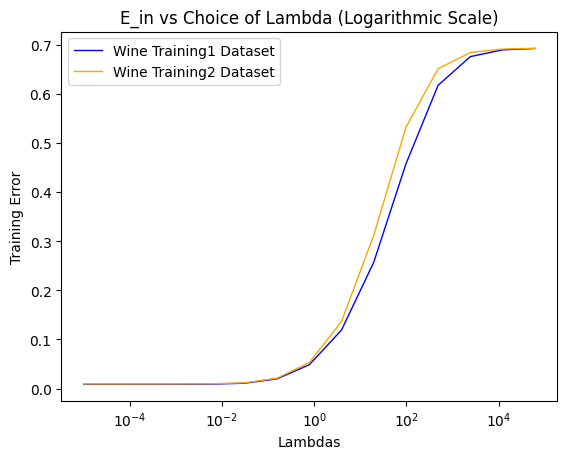

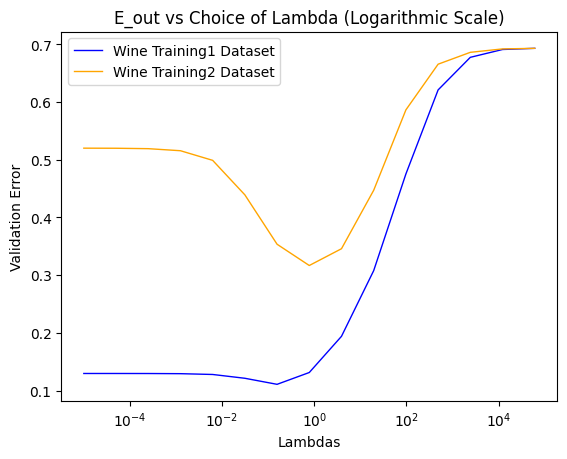

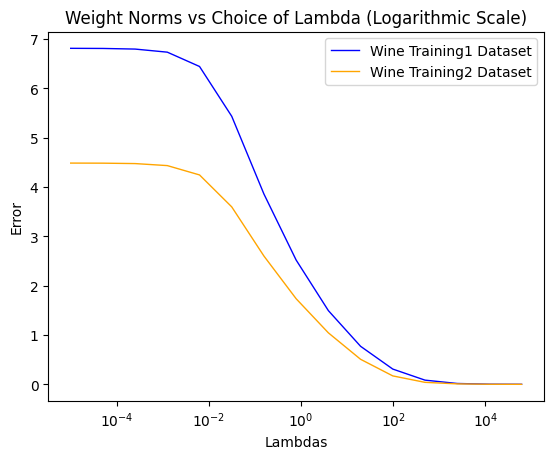

In [344]:
avg_E_ins_1 = np.divide(avg_E_ins_1, Y_full.shape[0])
avg_E_ins_2 = np.divide(avg_E_ins_2, Y_train.shape[0])
E_outs_1 = np.divide(E_outs_1, len(Y_val))
E_outs_2 = np.divide(E_outs_2, len(Y_val))

plt.figure()
plt.plot(lambdas, avg_E_ins_1, linewidth = 1, color = "blue")
plt.plot(lambdas, avg_E_ins_2, linewidth = 1, color = "orange")
plt.xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('Training Error')
plt.legend(["Wine Training1 Dataset", "Wine Training2 Dataset"])
plt.title("E_in vs Choice of Lambda (Logarithmic Scale)")
plt.show()

plt.figure()
plt.plot(lambdas, E_outs_1, linewidth = 1, color = "blue")
plt.plot(lambdas, E_outs_2, linewidth = 1, color = "orange")
plt.xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('Validation Error')
plt.legend(["Wine Training1 Dataset", "Wine Training2 Dataset"])
plt.title("E_out vs Choice of Lambda (Logarithmic Scale)")
plt.show()

plt.figure()
plt.plot(lambdas, final_weight_norms_1, linewidth = 1, color = "blue")
plt.plot(lambdas, final_weight_norms_2, linewidth = 1, color = "orange")
plt.xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('Error')
plt.legend(["Wine Training1 Dataset", "Wine Training2 Dataset"])
plt.title("Weight Norms vs Choice of Lambda (Logarithmic Scale)")
plt.show()
